In [3]:
import tweepy
import csv #Import csv

with open('../credentials.txt', 'r') as credentials:
    credentials.readline()
    api_key = credentials.readline().rstrip()
    api_key_secret = credentials.readline().rstrip()
    credentials.readline()
    access_token = credentials.readline().rstrip()
    access_token_secret = credentials.readline().rstrip()


In [4]:
auth = tweepy.auth.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [39]:
# Open/create a file to append data to
csvFile = open('../dataset/prova.csv', 'a', encoding="UTF-8")

#Use csv writer
csvWriter = csv.writer(csvFile)

tweets = []
ratios = []

for tweet in tweepy.Cursor(api.search,
                           q = "from:misspickledplum AND -filter:retweets AND -filter:replies",
                           until='2020-01-24',
                           tweet_mode='extended').items():

    tweets.append(tweet)

    if tweet.user.followers_count == 0:
        continue

    ratio = (tweet.favorite_count) / tweet.user.followers_count
    ratios.append(ratio)

    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.user.name, tweet.created_at, tweet.full_text,tweet.retweet_count, tweet.favorite_count, ratio])
csvFile.close()

print(ratios)

[0.002880184331797235, 0.002551020408163265, 0.003949967083607637, 0.0026333113890717576, 0.0014812376563528638, 0.0030447662936142197, 0.012672811059907835, 0.001152073732718894, 0.0030447662936142197, 0.004279131007241606, 0.0013166556945358788, 0.0010697827518104015]


In [40]:
len(tweets)

12

In [59]:
tweet

Status(_api=<tweepy.api.API object at 0x7f58b815a198>, _json={'created_at': 'Tue Jan 14 17:03:05 +0000 2020', 'id': 1217130022663860224, 'id_str': '1217130022663860224', 'full_text': 'These savory #vegetarian stuffed peppers are colorful, filling, delicious and guilt-free 😋\n#StuffedPeppers #easyrecipe #feedfeed #f52grams #buzzfeast #nom\nGet the Recipe 👉 https://t.co/N2Y5imJar6 https://t.co/1YZZPM4VX7', 'truncated': False, 'display_text_range': [0, 195], 'entities': {'hashtags': [{'text': 'vegetarian', 'indices': [13, 24]}, {'text': 'StuffedPeppers', 'indices': [91, 106]}, {'text': 'easyrecipe', 'indices': [107, 118]}, {'text': 'feedfeed', 'indices': [119, 128]}, {'text': 'f52grams', 'indices': [129, 138]}, {'text': 'buzzfeast', 'indices': [139, 149]}, {'text': 'nom', 'indices': [150, 154]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/N2Y5imJar6', 'expanded_url': 'https://buff.ly/2C5su63', 'display_url': 'buff.ly/2C5su63', 'indices': [172, 195]}], 'media': [{'i

In [60]:
date = []
retweet_count = []

for tweet in tweets:
    print(tweet.created_at, tweet.retweet_count)
    date.append(tweet.created_at)
    retweet_count.append(tweet.retweet_count)
    

2020-01-21 18:02:02 7
2020-01-21 17:03:03 8
2020-01-20 17:03:06 34
2020-01-19 18:03:02 5
2020-01-19 17:03:02 13
2020-01-18 17:03:04 20
2020-01-17 18:02:02 6
2020-01-17 17:03:05 3
2020-01-16 18:02:05 6
2020-01-16 17:03:02 9
2020-01-15 18:02:01 18
2020-01-15 17:03:03 9
2020-01-14 18:02:02 9
2020-01-14 17:03:05 17


In [61]:
%matplotlib inline

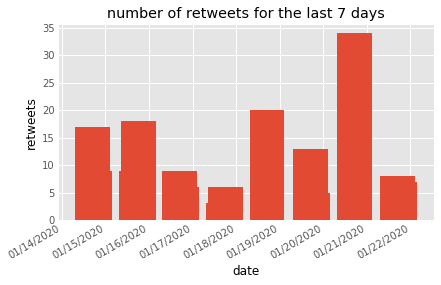

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('ggplot')
plt.xlabel('date', color='black')
plt.ylabel('retweets', color='black')
plt.title('number of retweets for the last 7 days')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.bar(date,retweet_count)
plt.gcf().autofmt_xdate()
plt.savefig('test.jpg')

In [63]:
import numpy
range = numpy.arange(1, len(tweets)+1, 1)

<BarContainer object of 14 artists>

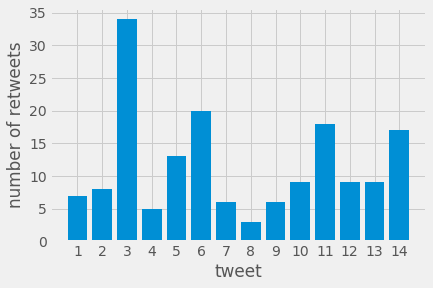

In [64]:
plt.style.use('fivethirtyeight')
plt.xlabel('tweet')
plt.ylabel('number of retweets')
plt.xticks(range)
plt.bar(range, retweet_count)